In [335]:
import torch
import torch.optim as optim
from torch.nn.functional import normalize
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import time
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Problem 1

In [278]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u
print(t_un)

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])


In [279]:
def model(t_u, w1, w2, b):
    return w1 * t_u ** 2 + w2 * t_u + b

def lin_model(t_u, w_lin, b_lin):
    return w_lin * t_u + b_lin

def loss_fn(t_p, t_c):
    squared_diff = (t_p - t_c)**2
    return squared_diff.mean()

In [282]:
w1 = torch.ones(())
w2 = torch.ones(())
w_lin = torch.ones(())
b = torch.zeros(())
b_lin = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p_lin = lin_model(t_u, w_lin, b_lin)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [127]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [128]:
def dloss_fn(t_p, t_c):
    dsq_diff = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diff

def dmodel_dw1(t_u, w1, w2, b):
    return t_u**2

def dmodel_dw2(t_u, w1, w2, b):
    return t_u

def dmodel_db(t_u, w1, w2, b):
    return 1

def dmodel_dwlin(t_u, w_lin, b_lin):
    return t_u

def dmodel_dblin(t_u, w_lin, b_lin):
    return 1

def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

def grad_lin_fn(t_u, t_c, t_p, w_lin, b_lin):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dwlin(t_u, w_lin, b_lin)
    dloss_db = dloss_dtp * dmodel_dblin(t_u, w_lin, b_lin)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [129]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_results):
    print(f'=============== Learning Rate = {learning_rate} ===============')
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
        
        params = params - learning_rate * grad
        if epoch % print_results == 0:        
            print(f'Epoch {epoch} --> Loss = {loss}')
    return params, loss

def training_loop_lin(n_epochs, learning_rate, params, t_u, t_c, print_results):
    print(f'=============== Learning Rate = {learning_rate} ===============')
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        t_p = lin_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_lin_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        if epoch % print_results == 0:        
            print(f'Epoch {epoch} --> Loss = {loss}')
    return params, loss

In [130]:
epochs = 5000
print_eras = 500
delta = [0.1, 0.01, 0.001, 0.0001]
ini_params = torch.tensor([1.0, 1.0, 0.0])
ini_lin_params = torch.tensor([1.0, 0.0])
trained_params = torch.zeros(len(delta), 3)
trained_loss = torch.zeros(len(delta), 1)
trained_lin_params = torch.zeros(1, 2)
trained_lin_loss = torch.zeros(1, 1)
for i in delta:
    trained_params[delta.index(i)], trained_loss[delta.index(i)] = training_loop(epochs, i, ini_params, t_un, t_c, print_eras)
trained_lin_params, trained_lin_loss = training_loop_lin(epochs, 1e-4, ini_lin_params, t_un, t_c, print_eras)

=============== Learning Rate = 0.1 ===============
Epoch 500 --> Loss = nan
Epoch 1000 --> Loss = nan
Epoch 1500 --> Loss = nan
Epoch 2000 --> Loss = nan
Epoch 2500 --> Loss = nan
Epoch 3000 --> Loss = nan
Epoch 3500 --> Loss = nan
Epoch 4000 --> Loss = nan
Epoch 4500 --> Loss = nan
Epoch 5000 --> Loss = nan
=============== Learning Rate = 0.01 ===============
Epoch 500 --> Loss = nan
Epoch 1000 --> Loss = nan
Epoch 1500 --> Loss = nan
Epoch 2000 --> Loss = nan
Epoch 2500 --> Loss = nan
Epoch 3000 --> Loss = nan
Epoch 3500 --> Loss = nan
Epoch 4000 --> Loss = nan
Epoch 4500 --> Loss = nan
Epoch 5000 --> Loss = nan
=============== Learning Rate = 0.001 ===============
Epoch 500 --> Loss = nan
Epoch 1000 --> Loss = nan
Epoch 1500 --> Loss = nan
Epoch 2000 --> Loss = nan
Epoch 2500 --> Loss = nan
Epoch 3000 --> Loss = nan
Epoch 3500 --> Loss = nan
Epoch 4000 --> Loss = nan
Epoch 4500 --> Loss = nan
Epoch 5000 --> Loss = nan
=============== Learning Rate = 0.0001 ===============
Epoch 500

In [131]:
print(trained_params)

tensor([[    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [ 0.5570, -0.8881, -0.8753]])


In [132]:
best_test = trained_params[3]
print(best_test)
t_p = model(t_un, *best_test)
t_p_lin = lin_model(t_un, *trained_lin_params)

tensor([ 0.5570, -0.8881, -0.8753])


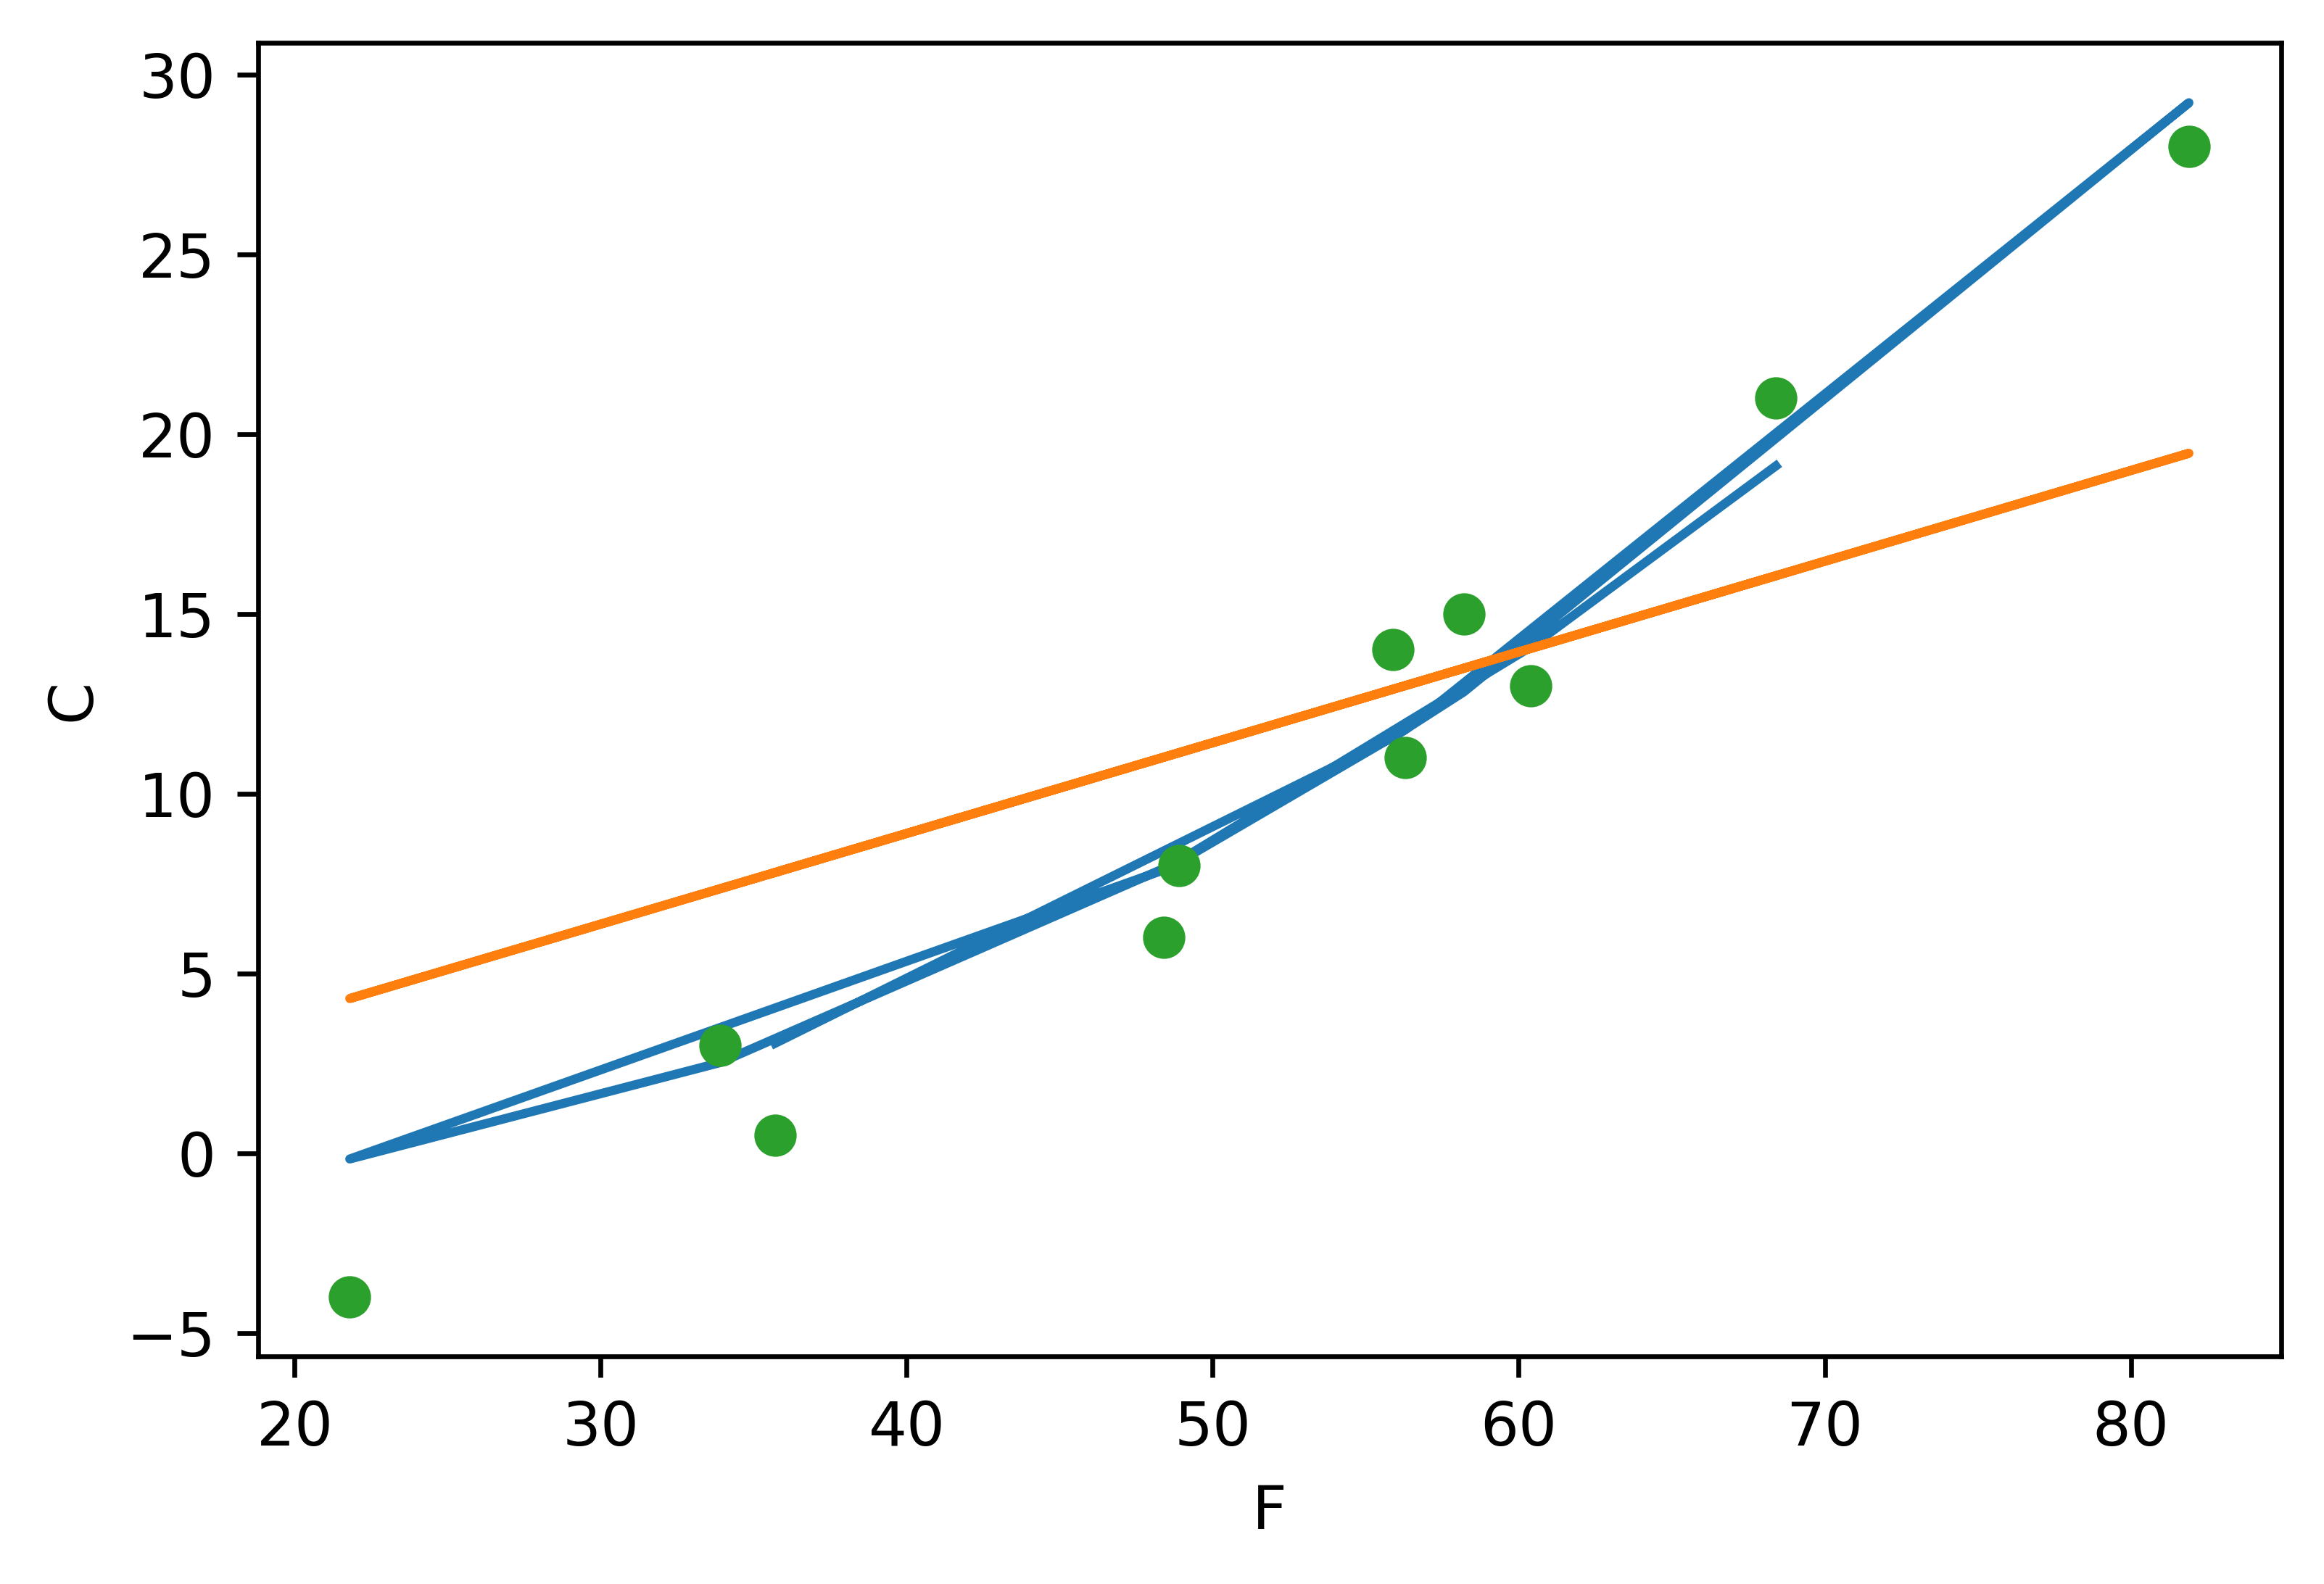

In [133]:
fig = plt.figure(dpi=600)
plt.xlabel("F")
plt.ylabel("C")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_p_lin.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

# Problem 2

In [264]:
feat_list = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
house = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'), columns = feat_list)
house.replace("yes", 1, inplace=True)
house.replace("no", 0, inplace=True)
house_scaled = StandardScaler().fit_transform(house)
house_scaled.shape

(545, 6)

In [357]:
house_train, house_test = train_test_split(house_scaled, train_size = 0.8, test_size = 0.2)

house_results_train = house_train[:,-1]
house_train = np.delete(house_train, house_train.shape[1]-1, -1)
house_results_train = torch.tensor(house_results_train)
house_train = torch.tensor(house_train)
house_train = torch.transpose(house_train, 0, 1)
house_train = torch.split(house_train, 1)

house_results_test = house_test[:,-1]
house_test = np.delete(house_test, house_test.shape[1]-1, -1)
house_results_test = torch.tensor(house_results_test)
house_test = torch.tensor(house_test)
house_test = torch.transpose(house_test, 0, 1)
house_test = torch.split(house_test, 1)

In [327]:
def lin_model_2(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return w5 * x5 + w4 * x4 + w3 * x3 + w2 * x2 + w1 * x1 + b

def loss_fn_2(t_p, result):
    squared_diff = (t_p - result)**2
    return squared_diff.mean()

def dloss_fn_2(t_p, result):
    dsq_diff = 2 * (t_p - result) / t_p.shape[0]
    return dsq_diff

def dmodel_dw5(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return x5

def dmodel_dw4(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return x4

def dmodel_dw3(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return x3

def dmodel_dw2(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return x2

def dmodel_dw1(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return x1

def dmodel_db(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return 1

def grad_fn(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b, result, t_p):
    dloss_dtp = dloss_fn_2(t_p, result)
    dloss_dw5 = dloss_dtp * dmodel_dw5(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b)
    dloss_dw4 = dloss_dtp * dmodel_dw4(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b)
    dloss_dw3 = dloss_dtp * dmodel_dw3(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b)
    return torch.stack([dloss_dw5.sum(), dloss_dw4.sum(), dloss_dw3.sum(), dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

def training_loop_2(n_epochs, learning_rate, params, train, train_result, test, test_result, print_results):
    print(f'=============== Learning Rate = {learning_rate} ===============')
    for epoch in range(1, n_epochs + 1):
        
        train_t_p = lin_model_2(*train, *params)
        train_t_p = torch.reshape(train_t_p, (-1,))
        train_loss = loss_fn(train_t_p, train_result)
                
        grad = grad_fn(*train, *params, train_result, train_t_p)
        params = params - learning_rate * grad
        if epoch % print_results == 0:
            test_t_p = lin_model_2(*test, *params)
            test_t_p = torch.reshape(test_t_p, (-1,))
            test_loss = loss_fn(test_t_p, test_result)
            print(f'Epoch {epoch} --> Training Loss = {train_loss}, Validation Loss = {test_loss}')
    return params, loss

In [328]:
epochs = 5000
print_eras = 500
delta = [0.1, 0.01, 0.001, 0.0001]
ini_params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
for i in range(len(delta)):
    trained_params, trained_loss = training_loop_2(epochs, delta[i], ini_params, house_train, house_results_train, house_test, house_results_test, print_eras)
    print(f"The Final Trained Parameters are {trained_params}")

=============== Learning Rate = 0.1 ===============
Epoch 500 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 1000 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 1500 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 2000 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 2500 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 3000 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 3500 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 4000 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 4500 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
Epoch 5000 --> Training Loss = 0.4420248393303922, Validation Loss = 0.4312726671658319
The Final Trained Parameters are tensor([ 0.3715,  0.0556,  0.2951,  

# Problem 3

In [410]:
n_samples = house_scaled.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
test_indices = shuffled_indices[-n_val:]

house_train = house_scaled[train_indices, :-1]
house_train = torch.tensor(house_train)
house_results_train = house_scaled[train_indices,-1]
house_results_train = torch.tensor(house_results_train)

house_test = house_scaled[test_indices, :-1]
house_test = torch.tensor(house_test)
house_results_test = house_scaled[test_indices,-1]
house_results_test = torch.tensor(house_results_test)

In [417]:
linear_mod = nn.Sequential(nn.Linear(5, 8), nn.Tanh(), nn.Linear(8, 5))
linear_mod_2 = nn.Sequential(nn.Linear(5, 8), nn.Tanh(), nn.Linear(8, 12), nn.Tanh(), nn.Linear(12, 8), nn.Tanh(), nn.Linear(8, 5))
optimizer = optim.SGD(linear_mod.parameters(), lr=1e-3)

In [418]:
def training_loop_nn(n_epochs, optimizer, model, loss_fn, train, train_result, test, test_result, print_results):
    for epoch in range(1, n_epochs + 1):
        
        train_t_p = model(train.float())
        train_t_p = torch.transpose(train_t_p, 0, 1)
        train_loss = loss_fn(train_t_p, train_result)
               
        test_t_p = model(test.float())
        test_t_p = torch.transpose(test_t_p, 0, 1)
        test_loss = loss_fn(test_t_p, test_result)
        
        optimizer.zero_grad()
        train_loss.backward
        optimizer.step()

        if epoch % print_results == 0:
            print(f'Epoch {epoch} --> Training Loss = {train_loss}, Validation Loss = {test_loss}')

In [421]:
epochs = 200
print_results = 200

print("For 1 Hidden Layer of 8 nodes:")
training_loop_nn(epochs, optimizer, linear_mod, nn.MSELoss(), house_train, house_results_train, house_test, house_results_test, print_results)

print("For 3 Hidden Layers of 8, 12, and 8 nodes, respectively:")
training_loop_nn(epochs, optimizer, linear_mod_2, nn.MSELoss(), house_train, house_results_train, house_test, house_results_test, print_results)

For 1 Hidden Layer of 8 nodes:
Epoch 200 --> Training Loss = 1.0446717865453987, Validation Loss = 1.3203037976970269
For 3 Hidden Layers of 8, 12, and 8 nodes, respectively:
Epoch 200 --> Training Loss = 0.9786599650175829, Validation Loss = 1.2652099585577825
